In [13]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame

In [14]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)

,n [count],H [mm],b [mm],d [mm],γ [N/mm3],Pmax [N],P0 [N]
0,3,90.0,19.4114,5.0,0.000016,9.080644,0.046939
1,3,90.0,12.9410,5.0,0.000016,8.758713,0.154249
2,6,90.0,19.4114,5.0,0.000016,11.753734,0.720029
3,6,90.0,12.9410,5.0,0.000016,10.797683,1.032218
4,F,90.0,19.4114,5.0,0.000016,14.095079,2.017568


In [15]:
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])

In [16]:
#target pmax
pmax = np.array(features['Pmax [N]'])
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
features = np.array(features)




In [17]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [18]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (132, 11)
Training Labels Shape: (132,)
Testing Features Shape: (45, 11)
Testing Labels Shape: (45,)


In [19]:
#kernel (rbf)
clf = svm.SVR(kernel = "rbf")
clf.fit(train_features,train_labels)
print(clf.score(train_features, train_labels))

0.30594053399446797


C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:

errors = 0
pmax_pred = np.empty(test_labels.shape)
i = 0
for X,y in zip(test_features, test_labels):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")
    errors += abs(clf.predict([X])[0] - y)
    pmax_pred[i] = clf.predict([X])[0]
    i += 1
errors = errors / test_features.shape[0]

print('Mean Absolute error:',round(errors, 2) , 'newton.')

# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(pmax_pred)
print(test_labels)


Model: 20.5173201002947, Actual: 16.465722631585038
Model: 17.782737164510657, Actual: 10.497081539108782
Model: 11.285639763661582, Actual: 9.639485549900499
Model: 22.50601211967903, Actual: 42.357748607195
Model: 14.197638824961945, Actual: 6.063413449065
Model: 20.154736784501306, Actual: 26.367723489059344
Model: 11.446260335616433, Actual: 7.934872992134267
Model: 29.56808755906563, Actual: 51.879055492810004
Model: 9.47848509130506, Actual: 7.861187715016644
Model: 19.289207047477035, Actual: 13.370124772445
Model: 19.745058624290554, Actual: 14.934077561135252
Model: 23.221038924325967, Actual: 20.180180267904998
Model: 19.94778869552822, Actual: 21.94836557635784
Model: 9.222661491994648, Actual: 5.702605711267501
Model: 15.878159567735189, Actual: 13.890200587874556
Model: 20.098957142675463, Actual: 15.198136307690001
Model: 14.331179205282062, Actual: 13.187881911505
Model: 19.926277378200297, Actual: 23.019568288955004
Model: 13.330550692346407, Actual: 12.050443881944995


In [21]:
new = DataFrame(pmax_pred, test_labels)
new.to_csv("line_to_scatter_converter.csv")

In [20]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

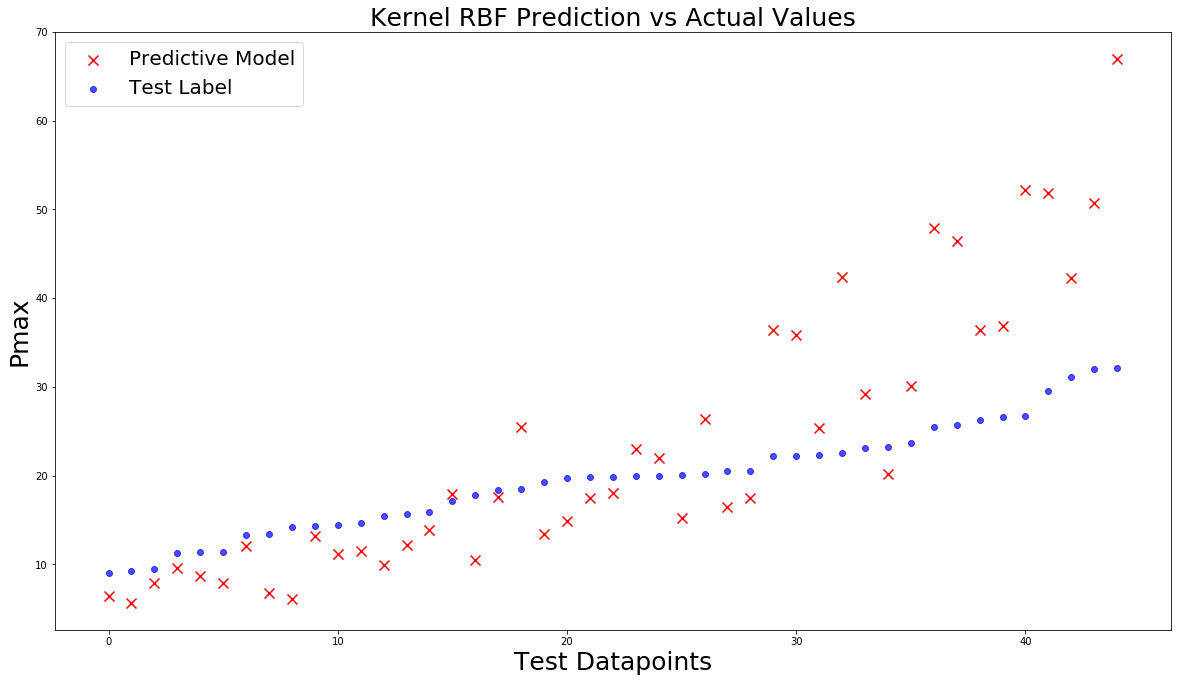

In [21]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Kernel RBF Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("T_RBF_plot.png")